In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers


In [2]:
img_array = cv2.imread("Test_Dataset\Closed_Eyes/s0015_00001_0_0_0_0_1_01.png",cv2.IMREAD_GRAYSCALE)

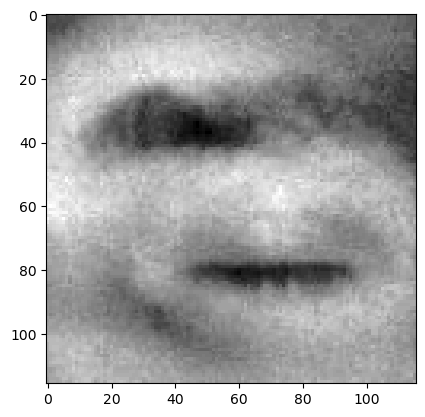

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(116, 116)

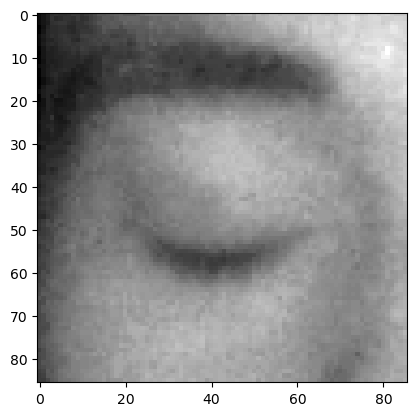

In [5]:
Datadirectory ="Train_Dataset/"  ##training dataset
Classes = ["Closed_Eyes","Open_Eyes"]  ## list of classes
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap ="gray")
        plt.show()
        break
    break

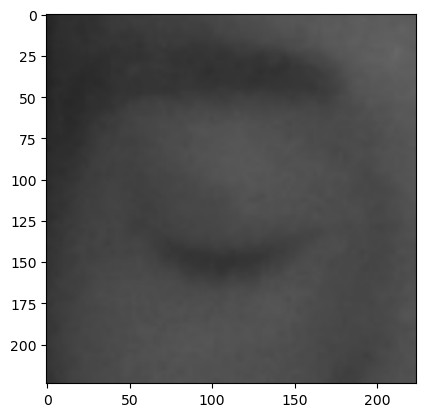

In [6]:
img_size =224

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap ="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category) ##  0,1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

3338


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size , 3)

In [12]:
X.shape

(3338, 224, 224, 3)

In [13]:
# Normalize the data
X = X/255.0; ## we are normalizing it

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Deep Learning model for training - Training Learning

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# Transfer Learning

In [20]:
base_input = model.layers[0].input  ##input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node(1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

# Setting for binary classification (open/closed)

In [25]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam" , metrics =["accuracy"])

In [26]:
new_model.fit(X,Y ,epochs = 1, validation_split=0.1)  ##training

94/94 [==============================] - 568s 6s/step - loss: 0.0518 - accuracy: 0.9817 - val_loss: 0.9880 - val_accuracy: 0.8413


In [27]:
new_model.save('my_model.h5')

In [28]:
new_model = tf.keras.models.load_model('my_model.h5')

#  checking the network prediction

In [29]:
img_array = cv2.imread('s0037_00101_1_0_0_0_1_01.png' , cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [30]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [31]:
X_input.shape

(1, 224, 224, 3)

In [32]:
X_input = X_input/255.0

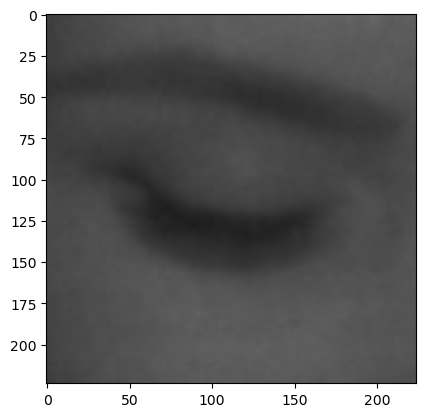

In [33]:
plt.imshow(new_array)

In [34]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 765ms/step


In [35]:
prediction

array([[0.00010743]], dtype=float32)

# lets check on Unknown Images

In [36]:
img = cv2.imread('sad_women.webp')

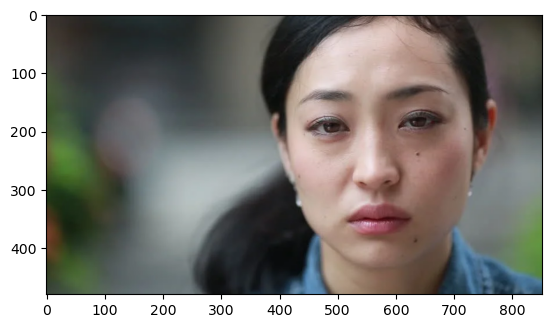

In [37]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

In [39]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')

In [40]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [41]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [42]:
for (x , y ,w , h) in eyes:
    cv2.rectangle(img,(x ,y),(x+w ,y+h),(0,255,0),2)

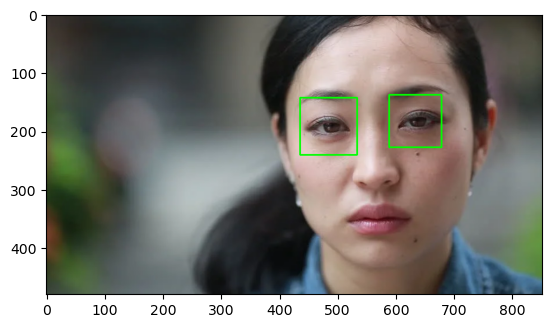

In [43]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Cropping the eye image

In [44]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h , x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for(ex ,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh , ex: ex + ew]

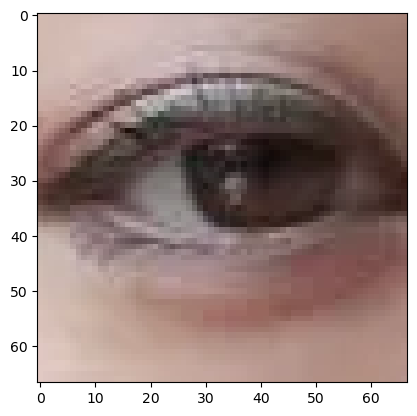

In [45]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [46]:
eyes_roi.shape

(67, 67, 3)

In [47]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [48]:
final_image.shape

(1, 224, 224, 3)

In [49]:
new_model.predict(final_image)

1/1 [==============================] - 0s 69ms/step


array([[1.]], dtype=float32)

# Realtime Video Demo

## first detect that eyes are closed on open

In [70]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# checj if web cam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x, y),(x+w, y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex , ey ,ew ,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    prediction = new_model.predict(final_image)
    if (prediction>0):
        status = "Open Eyes"
    else:
        status ="Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x ,y), (x+w, y+h),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use PutText() method for
    # inserting text on video
    cv2.putText(frame, status,(50,50),font, 3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drawsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
                                   
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 78ms/step
False
1/1 [==============================] - 0s 70ms/step
False
eyes are not detected
1/1 [==============================] - 0s 66ms/step
False
1/1 [==============================] - 0s 79ms/step
False
eyes are not detected
1/1 [==============================] - 0s 74ms/step
False
1/1 [==============================] - 0s 80ms/step
False
1/1 [==============================] - 0s 78ms/step
False
eyes are not detected
1/1 [==============================] - 0s 73ms/step
False
1/1 [==============================] - 0s 85ms/step
False
eyes are not detected
1/1 [==============================] - 0s 83ms/step
False
1/1 [==============================] - 0s 77ms/step
False
eyes are not detected
1/1 [==============================] - 0s 81ms/step
False
eyes are not detected
1/1 [==============================] - 0s 77ms/step
False
eyes are not detected
1/1 [==============================] - 0s 74ms/step
False
eyes are not detected
1/1 [=======

# if eyes are closed for unusual time,like more than blinks for new second alarm generated

In [75]:
import winsound
frequency = 2500
duration = 1000
import numpy as np

import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x, y),(x+w, y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex , ey ,ew ,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex + ew]
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # draw a rectangle around the faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x , y),(x+w ,y+w),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use putText() method for
    # inserting text on video
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    prediction = new_model.predict(final_image)
    if (prediction>0):
        status = "Open Eyes"
        cv2.putText(frame,status,(150,150),font , 3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        # draw black background rectangle
        
        cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        
        # add text
        
        cv2.putText(frame,'Active',(x1 +int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    else:
        counter = counter +1
        status ="Closed Eyes"
        cv2.putText(frame,status,(150,150),font , 3,(0,255,0),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x ,y), (x+w, y+h),(0,255,0),2)
        
        if counter>5:
            
            x1,y1,w1,h1 = 0,0,175,75
            
            # draw black background rectangle
            cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
            
            # add text
            cv2.putText(frame,'Sleep_Alert !!', (x1 +int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            winsound.Beep(frequency, duration)
            counter = 0
             
        
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     print(faceCascade.empty())
#     faces = faceCascade.detectMultiScale(gray,1.1,4)
    
#     for(x,y,w,h) in faces:
#         cv2.rectangle(frame, (x ,y), (x+w, y+h),(0,255,0),2)
        
#     font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use PutText() method for
    # inserting text on video
#     cv2.putText(frame, status,(50,50),font, 3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drawsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
                                   
cap.release()
cv2.destroyAllWindows()

False
1/1 [==============================] - 0s 78ms/step
False
1/1 [==============================] - 0s 84ms/step
False
1/1 [==============================] - 0s 93ms/step
eyes are not detected
False
1/1 [==============================] - 0s 78ms/step
eyes are not detected
False
1/1 [==============================] - 0s 79ms/step
False
1/1 [==============================] - 0s 75ms/step
False
1/1 [==============================] - 0s 69ms/step
False
1/1 [==============================] - 0s 63ms/step
False
1/1 [==============================] - 0s 83ms/step
False
1/1 [==============================] - 0s 76ms/step
False
1/1 [==============================] - 0s 81ms/step
eyes are not detected
False
1/1 [==============================] - 0s 76ms/step
eyes are not detected
False
1/1 [==============================] - 0s 69ms/step
False
1/1 [==============================] - 0s 83ms/step
False
1/1 [==============================] - 0s 63ms/step
False
1/1 [==============================]

In [76]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# checj if web cam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x, y),(x+w, y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex , ey ,ew ,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    prediction = new_model.predict(final_image)
    if (prediction==1):
        status = "Open Eyes"
    else:
        status ="Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x ,y), (x+w, y+h),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use PutText() method for
    # inserting text on video
    cv2.putText(frame, status,(50,50),font, 3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drawsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
                                   
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 69ms/step
False
eyes are not detected
1/1 [==============================] - 0s 79ms/step
False
1/1 [==============================] - 0s 100ms/step
False
1/1 [==============================] - 0s 68ms/step
False
1/1 [==============================] - 0s 114ms/step
False
1/1 [==============================] - 0s 69ms/step
False
1/1 [==============================] - 0s 85ms/step
False
1/1 [==============================] - 0s 82ms/step
False
1/1 [==============================] - 0s 105ms/step
False
1/1 [==============================] - 0s 91ms/step
False
1/1 [==============================] - 0s 106ms/step
False
1/1 [==============================] - 0s 77ms/step
False
1/1 [==============================] - 0s 108ms/step
False
1/1 [==============================] - 0s 79ms/step
False
1/1 [==============================] - 0s 86ms/step
False
eyes are not detected
1/1 [==============================] - 0s 75ms/step
False
1/1 [==================